In [1]:
import tensorflow as tf

In [2]:
print("\n tensorflow version: ", tf.__version__)


 tensorflow version:  2.4.1


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

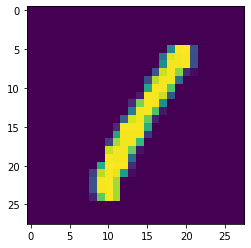

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.squeeze(train_images[3]))
plt.show()

In [5]:
train_labels[3]

1

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
# Model create

In [9]:
model = tf.keras.models.Sequential(
[
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
#     tf.keras.layers.Softmax()
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Model compile

In [12]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
## Training 
H = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8212 - accuracy: 0.2545 - val_loss: 1.5363 - val_accuracy: 0.3718
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5027 - accuracy: 0.3720 - val_loss: 1.4554 - val_accuracy: 0.3950
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3906 - accuracy: 0.4079 - val_loss: 1.2545 - val_accuracy: 0.5144
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1948 - accuracy: 0.5177 - val_loss: 1.1288 - val_accuracy: 0.5842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0154 - accuracy: 0.6036 - val_loss: 0.8255 - val_accuracy: 0.7245
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7806 - accuracy: 0.7364 - val_loss: 0.7118 - val_accuracy: 0.7679
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6858 - accuracy: 0.7687 - val_loss: 0.6481 - val_accuracy:

In [14]:
import pandas as pd

In [15]:
frame = pd.DataFrame(H.history)

In [16]:
frame.head()

,loss,accuracy,val_loss,val_accuracy
0,2.400611,0.314217,1.536339,0.3718
1,1.480643,0.375383,1.455406,0.3950
2,1.342995,0.438050,1.254526,0.5144
3,1.154418,0.538017,1.128775,0.5842
4,0.960731,0.642300,0.825457,0.7245


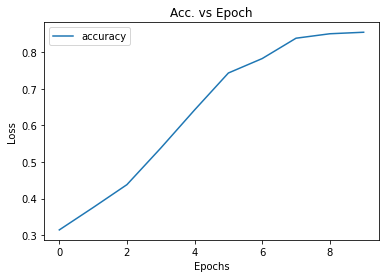

In [17]:
acc_plot = frame.plot(y="accuracy", title="Acc. vs Epoch")
acc_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

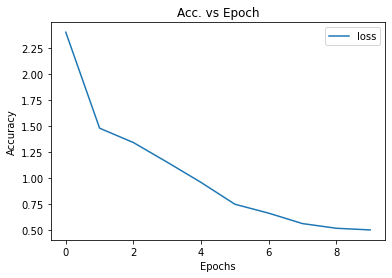

In [18]:
acc_plot = frame.plot(y="loss", title="Acc. vs Epoch")
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

In [19]:
# Evaluate

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 857us/step - loss: 0.4872 - accuracy: 0.8637


In [21]:
test_loss, test_accuracy

(0.48720189929008484, 0.8636999726295471)

In [22]:
# lets get model prediction on randomly selected test images

In [23]:
num_test_images = test_images.shape[0]
random_index = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_index]
random_test_labels = test_labels[random_index]

predictions = model.predict(random_test_images)

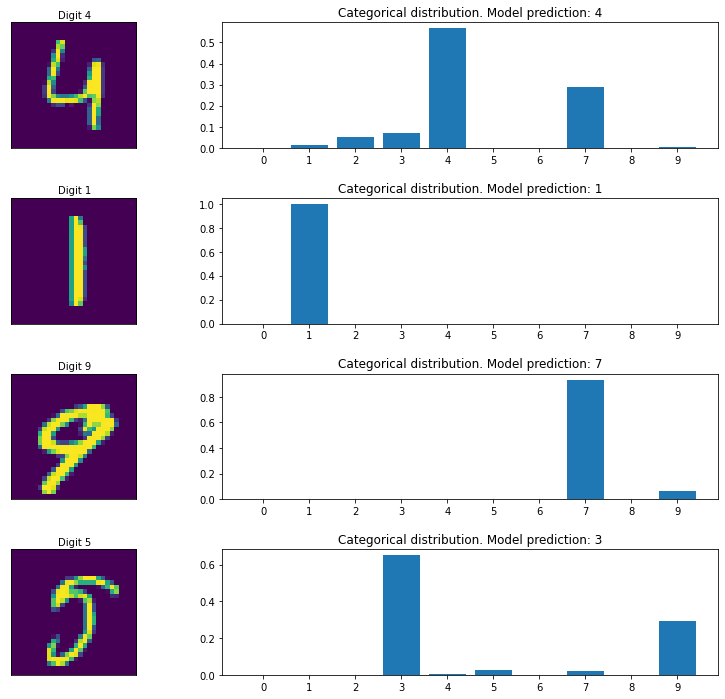

In [24]:
#to get model predictions on randomly selected test images

num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx]
random_test_labels = test_labels[random_inx]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()